Author: Neven Caplar and the LINCC Frameworks team

Last updated: November 13, 2025

# Problem 1

## Crossmatch ZTF-GAIA to Rubin 

Ok, this was ZTF-GAIA crossmatch in one of the Rubin DP1 fields. Can you crossmatch with Rubin object data? Visualize the crossmatched objects.

How to access Rubin data tutorial is at: https://docs.lsdb.io/en/latest/tutorials/pre_executed/rubin_dp1.html 

# Solution 1 

In [1]:
import numpy as np
import lsdb
import nested_pandas as npd
from lsdb import ConeSearch
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Configuration settings
rcParams["savefig.dpi"] = 550
rcParams["font.size"] = 20

In [2]:
# Define the six fields from Data Preview 1 with RA and Dec coordinates
fields = {
    "ECDFS": (53.13, -28.10),  # Extended Chandra Deep Field South
    "EDFS": (59.10, -48.73),  # Euclid Deep Field South
    "Rubin_SV_38_7": (37.86, 6.98),  # Low Ecliptic Latitude Field
    "Rubin_SV_95_-25": (95.00, -25.00),  # Low Galactic Latitude Field
    "47_Tuc": (6.02, -72.08),  # 47 Tuc Globular Cluster
    "Fornax_dSph": (40.00, -34.45)  # Fornax Dwarf Spheroidal Galaxy
}

# Define a 2-degree (2*3600 arcseconds) search radius
radius_arcsec = 2 * 3600  # Convert 2 degree to arcseconds
# Create six cone searches
cones = {name: ConeSearch(ra=ra, dec=dec, radius_arcsec=radius_arcsec) for name, (ra, dec) in fields.items()}

In [3]:
# load gaia_ztf_xmatch
gaia_ztf_xmatch = npd.read_parquet('gaia_ztf_xmatch')

In [4]:
# We load the gaia-ztf crossmatch that we just computed, and open avaliable Rubin catalogs
gaia_ztf_xmatch_lsdb = lsdb.from_dataframe(gaia_ztf_xmatch,  ra_column="ra_gaia", dec_column="dec_gaia");
rubin_object_path = '/rubin/lsdb_data/object_collection/'
rubin = lsdb.open_catalog(rubin_object_path, columns=['coord_ra', 'coord_dec'])

In [5]:
# And now we crossmatch with Rubin data!
rubin_gaia_ztf = gaia_ztf_xmatch_lsdb.crossmatch(rubin)
rubin_gaia_ztf_computed = rubin_gaia_ztf.compute()

/opt/lsst/software/stack/conda/envs/lsst-scipipe-12.0.0/lib/python3.13/site-packages/lsdb/catalog/catalog.py:256: FutureWarning: The default suffix behavior will change from applying suffixes to all columns to only applying suffixes to overlapping columns in a future release.To maintain the current behavior, explicitly set `suffix_method='all_columns'`. To change to the new behavior, set `suffix_method='overlapping_columns'`.
  warnings.warn(


In [6]:
# Here it is, the final dataframe with the crossmatch of Rubin, Gaia and ZTF
rubin_gaia_ztf_computed

,ra_gaia_from_lsdb_dataframe,dec_gaia_from_lsdb_dataframe,parallax_gaia_from_lsdb_dataframe,parallax_over_error_gaia_from_lsdb_dataframe,teff_gspphot_gaia_from_lsdb_dataframe,logg_gspphot_gaia_from_lsdb_dataframe,classprob_dsc_combmod_star_gaia_from_lsdb_dataframe,ra_ztf_dr14_from_lsdb_dataframe,dec_ztf_dr14_from_lsdb_dataframe,nobs_g_ztf_dr14_from_lsdb_dataframe,nobs_r_ztf_dr14_from_lsdb_dataframe,_dist_arcsec_from_lsdb_dataframe,coord_ra_object_lc,coord_dec_object_lc,_dist_arcsec
_healpix_29,,,,,,,,,,,,,,,
1450077861930989469,94.993653,-25.661755,0.252448,6.910892,5673.09668,4.5351,0.999971,94.993656,-25.661749,117,413,0.025125,94.993657,-25.661744,0.044578
1450077930408129558,95.013459,-25.64216,0.816317,29.236389,5416.935547,4.5429,0.999953,95.013451,-25.642158,117,421,0.029532,95.013449,-25.642156,0.036778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456202518180007816,94.782764,-24.358055,1.135773,52.401779,5434.419922,4.5422,0.999941,94.782776,-24.35806,117,421,0.042684,94.782781,-24.358075,0.090862
1456202895076724453,94.777345,-24.347449,0.364969,5.135236,5430.23291,4.6277,0.999974,94.777348,-24.347444,113,404,0.02042,94.777345,-24.347439,0.034026


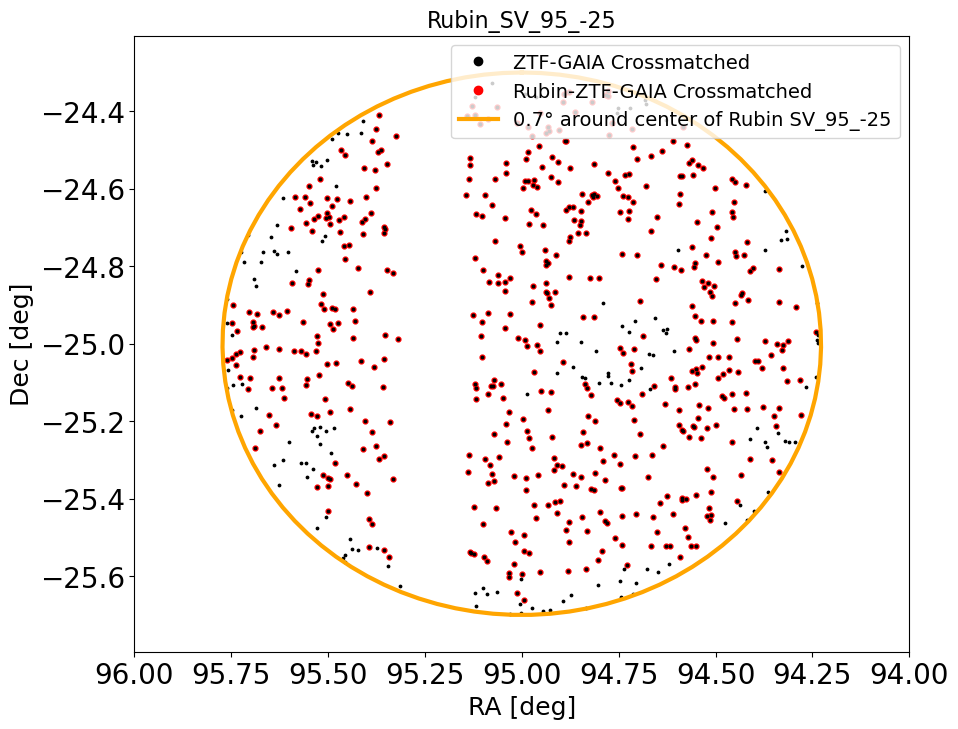

In [7]:
# Extract the center coordinates from the cones dictionary for Rubin_SV_95_-25
ra_center, dec_center = cones["Rubin_SV_95_-25"].ra, cones["Rubin_SV_95_-25"].dec
center = SkyCoord(ra=ra_center * u.deg, dec=dec_center * u.deg, frame="icrs")

# Create the figure
plt.figure(figsize=(10, 8))

# Main scatter plots
plt.scatter(rubin_gaia_ztf_computed["ra_gaia_from_lsdb_dataframe"].values,\
    rubin_gaia_ztf_computed["dec_gaia_from_lsdb_dataframe"].values, color="red", s=12, label="ZTF-GAIA Crossmatched")
plt.scatter(gaia_ztf_xmatch["ra_gaia"].values, gaia_ztf_xmatch["dec_gaia"].values, color="black", s=3, label="Rubin-ZTF-GAIA Crossmatched")

# Plot a 0.7-degree radius circle around the center
circle_coord = center.directional_offset_by(
    position_angle=np.linspace(0, 360, 100) * u.deg, separation=.7 * u.deg
)
plt.plot(circle_coord.ra.deg, circle_coord.dec.deg, color="orange", lw=3, label="0.7° around center of Rubin SV_95_-25")

# Ensure axis limits are set correctly (adjusting around the field center)
plt.axis([ra_center - 1, ra_center + 1, dec_center - 1, dec_center + 1])  
plt.gca().set_autoscale_on(False)  # Prevent auto-rescaling

# Ensure equal aspect ratio for RA and Dec
plt.gca().set_aspect("equal", adjustable="datalim")
# Labels and legend with bigger font and matching labels
legend_labels = ["ZTF-GAIA Crossmatched", "Rubin-ZTF-GAIA Crossmatched", "0.7° around center of Rubin SV_95_-25"]
legend_colors = ["black", "blue", "red"]
legend_handles = [
    plt.Line2D([0], [1], color="black", marker="o", linestyle="None", markersize=6, label="ZTF-GAIA Crossmatched"),
    plt.Line2D([0], [1], color="red", marker="o", linestyle="None", markersize=6, label="Rubin-ZTF-GAIA Crossmatched"),
    plt.Line2D([0], [1], color="orange", lw=3, linestyle="-", label="0.7° around center of Rubin SV_95_-25")
]


plt.legend(legend_handles, legend_labels, loc="upper right", fontsize=14, scatterpoints=1)

# Labels
plt.xlabel("RA [deg]", fontsize=18)
plt.ylabel("Dec [deg]", fontsize=18)

# Adjust the x-axis direction
plt.gca().invert_xaxis()

# Title to indicate the field being plotted
plt.title("Rubin_SV_95_-25", fontsize=16)

# Show the plot
plt.show()